In [1]:
# https://platform.olimpiada-ai.ro/problems/51

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [2]:
train = pd.read_csv("/kaggle/input/the-national-rabbit/train_data.csv")
test = pd.read_csv("/kaggle/input/the-national-rabbit/test_data.csv")

train['Ureche_lăsată'] = train['Ureche_lăsată'].astype(int)
test['Ureche_lăsată'] = test['Ureche_lăsată'].astype(int)

train['Apare_gușa'] = train['Apare_gușa'].astype(int)
test['Apare_gușa'] = test['Apare_gușa'].astype(int)

train.shape, test.shape

((700, 13), (300, 12))

In [3]:
train.head(3)

,ID,Sex,Greutate,Lungime_urechi,Ureche_lăsată,Culoare,Vârstă,Tip_blană,Calitate_blană,Formă_corp,Apare_gușa,Sănătate,Scor_jurizare
0,542,Femelă,1.6,19.1,0,Havana,9,Scurtă,Excelentă,Incorectă,0,Probleme_grave_de_sănătate,0
1,441,Mascul,2.7,22.1,0,Agouti,18,Lungă,Excelentă,Aproape_corectă,0,Probleme_grave_de_sănătate,0
2,483,Femelă,7.7,42.3,1,Alb,10,Lungă,Foarte_bună,Corectă,0,Ușoare_probleme_de_sănătate,93


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              700 non-null    int64  
 1   Sex             700 non-null    object 
 2   Greutate        700 non-null    float64
 3   Lungime_urechi  700 non-null    float64
 4   Ureche_lăsată   700 non-null    int64  
 5   Culoare         700 non-null    object 
 6   Vârstă          700 non-null    int64  
 7   Tip_blană       700 non-null    object 
 8   Calitate_blană  700 non-null    object 
 9   Formă_corp      700 non-null    object 
 10  Apare_gușa      700 non-null    int64  
 11  Sănătate        700 non-null    object 
 12  Scor_jurizare   700 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 71.2+ KB


In [5]:
num_cols = ['Greutate', 'Lungime_urechi', 'Ureche_lăsată', 'Vârstă', 'Apare_gușa']
cat_cols = ['Sex', 'Culoare', 'Tip_blană', 'Calitate_blană', 'Formă_corp', 'Sănătate']

target_col = 'Scor_jurizare'

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train_num = pd.DataFrame(scaler.fit_transform(train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(scaler.transform(test[num_cols]), columns=num_cols)

X_train_cat = pd.get_dummies(train[cat_cols], drop_first=True).astype(int)
X_test_cat = pd.get_dummies(test[cat_cols], drop_first=True).astype(int)
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

X, y = pd.concat([X_train_num, X_train_cat], axis=1), train[target_col]
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42, test_size=0.2)

In [7]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(max_iter=3500, random_state=42)

model.fit(X_train, y_train)

MLPRegressor(max_iter=3500, random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_valid)

score = mean_squared_error(y_valid, y_pred)

print(f'Score: {score:.5f}')

Score: 5.18519


In [9]:
model = MLPRegressor(max_iter=3500, random_state=42)

model.fit(X, y)

MLPRegressor(max_iter=3500, random_state=42)

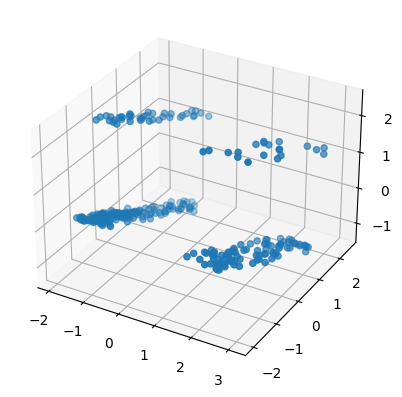

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca_data = pca.fit_transform(X_test)

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2])
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=3)

clusters = clusterer.fit_predict(X_test[num_cols])

In [40]:
y_pred = model.predict(X_test)

sids, dpids, answers = [1], [1], [len(test[(test['Culoare']=='Havana') & (test['Ureche_lăsată']==1) & (test['Sex']=='Femelă')])]

for i, dpid in enumerate(test['ID']):
    sids.append(3)
    dpids.append(dpid)
    answers.append(y_pred[i])

    sids.append(2)
    dpids.append(dpid)
    answers.append(clusters[i])

subm = pd.DataFrame({
    'subtaskID': sids,
    'datapointID': dpids,
    'answer': answers
})

subm.to_csv("submission.csv", index=False)

subm.head()

,subtaskID,datapointID,answer
0,1,1,11.000000
1,3,522,0.143278
2,2,522,0.000000
3,3,738,0.680726
4,2,738,2.000000
